## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
import os
import cv2 as cv #resize or reshape
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path
from tensorflow.keras.utils import to_categorical #Converts a class vector (integers) to binary class matrix.
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten #cnn layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
plt.rcParams.update({"font.size":20})

## Data Loading

In [3]:
data = np.load('dataset/data.npz')

In [4]:
X = data['x'] / 255 #data #normalisation
Y = data['y'] #lables

In [5]:
print(X.shape, Y.shape)

(253, 256, 256, 3) (253, 2)


## Data Splitting

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [7]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(202, 256, 256, 3) (202, 2) (51, 256, 256, 3) (51, 2)


## Data Visualization

In [8]:
Gabor_No_brain_tumor = 'processed/Gabor_Images/no/'
Gabor_Yes_brain_tumor = 'processed/Gabor_Images/yes/'

In [9]:
dirlist=[Gabor_No_brain_tumor, Gabor_Yes_brain_tumor]
filepaths=[]
for i in dirlist:
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)

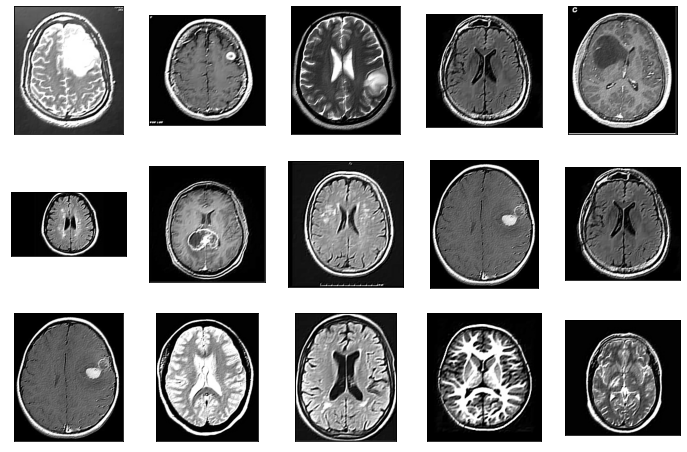

In [10]:
plt.figure(figsize=(12,8))
for i in range(15):
    random = np.random.randint(1,len(filepaths))
    plt.subplot(3,5,i+1)
    plt.imshow(cv.imread(filepaths[random]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Model-CNN(Convolutional Neural Network)

In [11]:
model = Sequential()

2022-03-15 11:11:24.651250: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.add(Conv2D(64, (5,5), activation='relu', padding='same', input_shape=(256, 256, 3))) #extract features
model.add(MaxPooling2D(pool_size=(2, 2))) #reduce the number of parameters when the images are too large
model.add(Conv2D(32, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5,5), activation='relu'))
model.add(Dropout(0.25)) #prevents overfitting
model.add(Flatten())#matrix is converted into one dimension
model.add(Dense(1024, activation="relu")) 
model.add(Dropout(0.25))
model.add(Dense(2, activation="softmax"))

In [13]:
adam = Adam(lr=0.0001, decay=1e-06) #reduces step size
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        12816     
                                                                 
 dropout (Dropout)           (None, 60, 60, 16)        0

### Model Building

In [15]:
history = model.fit(x= x_train,y= y_train,batch_size= 16,epochs= 10,validation_data= (x_test, y_test),shuffle=True)

Epoch 1/10
13/13 [==============================] - 21s 2s/step - loss: 0.6562 - accuracy: 0.6386 - val_loss: 0.5130 - val_accuracy: 0.7647
Epoch 2/10
13/13 [==============================] - 19s 1s/step - loss: 0.4366 - accuracy: 0.8020 - val_loss: 0.4540 - val_accuracy: 0.7843
Epoch 3/10
13/13 [==============================] - 18s 1s/step - loss: 0.3560 - accuracy: 0.8465 - val_loss: 0.4198 - val_accuracy: 0.8235
Epoch 4/10
13/13 [==============================] - 18s 1s/step - loss: 0.2881 - accuracy: 0.9158 - val_loss: 0.4705 - val_accuracy: 0.7451
Epoch 5/10
13/13 [==============================] - 18s 1s/step - loss: 0.1991 - accuracy: 0.9208 - val_loss: 0.5438 - val_accuracy: 0.7451
Epoch 6/10
13/13 [==============================] - 19s 1s/step - loss: 0.1504 - accuracy: 0.9505 - val_loss: 0.4426 - val_accuracy: 0.7843
Epoch 7/10
13/13 [==============================] - 19s 1s/step - loss: 0.0581 - accuracy: 1.0000 - val_loss: 0.6094 - val_accuracy: 0.7843
Epoch 8/10
13/13 [==

## History of Accuracy and Loss Plot-Graphs:

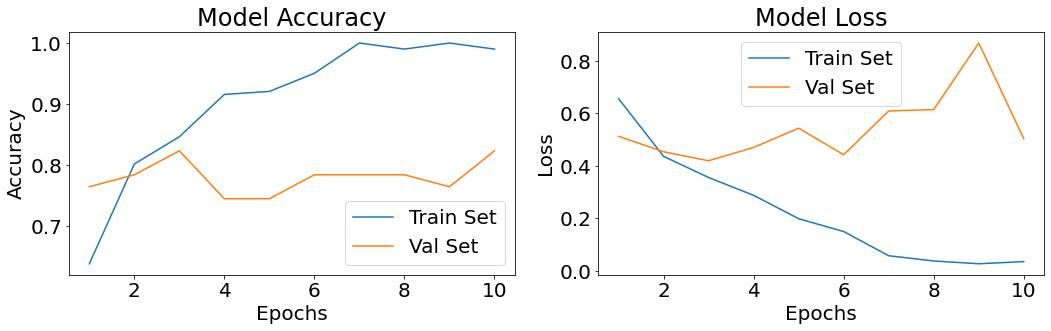

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

### Model Prediction

In [17]:
y_pred = model.predict(x_test, batch_size=3)

In [18]:
print(y_pred)

[[2.36175954e-02 9.76382434e-01]
 [9.99773204e-01 2.26779201e-04]
 [5.90032935e-01 4.09967095e-01]
 [1.79057345e-02 9.82094228e-01]
 [2.64947236e-01 7.35052824e-01]
 [3.52947158e-04 9.99647021e-01]
 [4.09390632e-04 9.99590576e-01]
 [2.92730957e-01 7.07269013e-01]
 [9.94633794e-01 5.36624016e-03]
 [6.13537244e-03 9.93864596e-01]
 [2.33141527e-05 9.99976635e-01]
 [2.77344156e-02 9.72265542e-01]
 [1.54388482e-02 9.84561205e-01]
 [5.86604059e-04 9.99413371e-01]
 [1.47473055e-03 9.98525321e-01]
 [7.88791999e-02 9.21120763e-01]
 [5.98943001e-03 9.94010508e-01]
 [1.10711545e-01 8.89288425e-01]
 [9.83422756e-01 1.65772494e-02]
 [9.96018827e-01 3.98112554e-03]
 [1.88298523e-03 9.98117089e-01]
 [2.63996959e-01 7.36003041e-01]
 [6.24615606e-03 9.93753850e-01]
 [4.02439712e-03 9.95975673e-01]
 [8.93081069e-01 1.06918879e-01]
 [2.44918163e-03 9.97550786e-01]
 [8.69083276e-04 9.99130905e-01]
 [8.70611370e-02 9.12938833e-01]
 [9.79036316e-02 9.02096391e-01]
 [5.01626618e-02 9.49837327e-01]
 [3.233995

In [19]:
y_predict = []
for i in range(0, len(y_pred)):
    y_predict.append(int(np.argmax(y_pred[i])))
len(y_predict)

51

In [20]:
print(y_predict)

[1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]


In [21]:
y_true = []
for i in range(0, len(y_test)):
    y_true.append(int(np.argmax(y_test[i])))
len(y_true)

51

In [22]:
print(y_true)

[1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1]


## Result Analysis

### Classification Report

In [23]:
print(classification_report(y_true=y_true,y_pred=y_predict))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71        20
           1       0.78      1.00      0.87        31

    accuracy                           0.82        51
   macro avg       0.89      0.78      0.79        51
weighted avg       0.86      0.82      0.81        51



### Confusion Matrix

In [24]:
labels=["Not_Tumor","Tumor"]

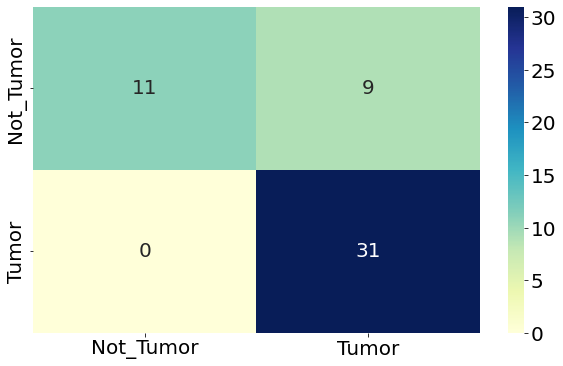

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(data=confusion_matrix(y_true=y_true,y_pred=y_predict),xticklabels=labels,yticklabels=labels,annot=True,fmt=".4g",cmap="YlGnBu")
plt.show()

## Model Saving

In [26]:
model_structure = model.to_json()
f = Path("gabor_model/gab_model_structure.json")
f.write_text(model_structure)

3680

In [27]:
model.save_weights("gabor_model/gab_model_weights.h5")